# Import Libraries

In [69]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

# Open the file
Open the file and take a look at it

In [70]:
# reading reviews from json file
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

reviews_df = pd.DataFrame(data)
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [71]:
reviews_df.shape

(497577, 12)

In [72]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<Axes: xlabel='overall', ylabel='count'>

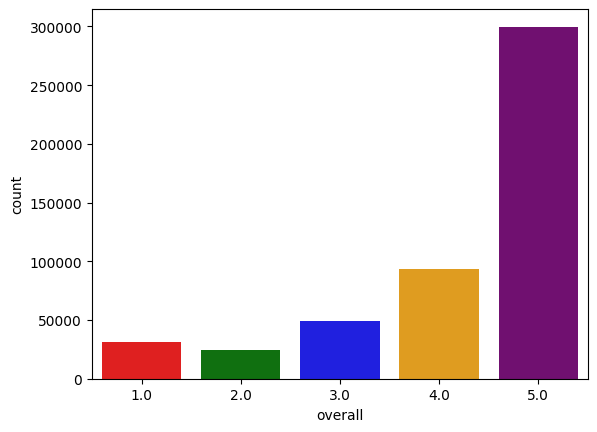

In [73]:
sns.countplot(data = reviews_df, x='overall', palette=['red', 'green', 'blue', 'orange', 'purple'], hue='overall', legend=False)

In [74]:
# how many reviews for how many products
print(f'\033[1m\033[4m{len(reviews_df["overall"])}\033[0m reviews for \033[1m\033[4m{len(reviews_df["asin"].value_counts(dropna=True))}\033[0m product')

# how many nan erview text
print(f'\033[1m\033[4m{reviews_df["reviewText"].isna().sum()}\033[0m reviews had no text (only overall rating).')

497577 reviews for 17408 product
158 reviews had no text (only overall rating).


# Undersample the data
Take a portion of the data that is balanced.

In [75]:
one_500 = reviews_df[reviews_df['overall']==1.0].sample(n=500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_500 = reviews_df[reviews_df['overall']==5.0].sample(n=500)

undersampled_reviews = pd.concat([one_500, two_500, three_500, four_500, five_500], axis=0)

In [76]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    500
2.0    500
3.0    500
4.0    500
5.0    500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

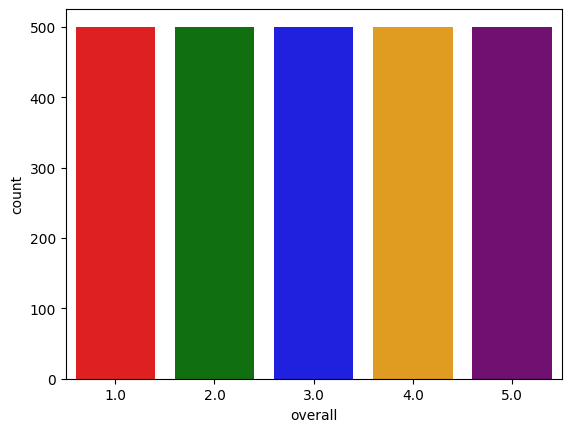

In [77]:
sns.countplot(data = undersampled_reviews, x='overall', palette=['red', 'green', 'blue', 'orange', 'purple'], hue='overall', legend=False)

# Create .csv data

In [78]:
undersampled_reviews.to_csv("undersampled_Video_Games_reviews.csv", index=False)